In [1]:
import numpy as np
import pandas as pd
import math
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
def Dataprocess(location):
    df = pd.read_csv(location)
    
    df.drop_duplicates(inplace=True)    # inplace is for overwriting
    
    df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
    
    # Use df.replace
    df.Sex[df.Sex == 'male'] = 1
    df.Sex[df.Sex == 'female'] = 0

    df.Embarked[df.Embarked == 'S'] = 1
    df.Embarked[df.Embarked == 'C'] = 0
    df.Embarked[df.Embarked == 'Q'] = 2
    
    age = df['Age']
    df['Age'] = (age - age.mean())/age.std()
    df['Age'].fillna(df['Age'].mean())

    fare = df['Fare']
    df['Fare'] = (fare - fare.mean())/fare.std()
    df['Fare'].fillna(df['Fare'].mean())

    df.ffill(inplace = True) 
    print(df.isna().sum())
    return df

In [3]:
# split into train test sets
train_loc = r"C:\Users\varun\Coding\ML\Titanic_full\titanic\train.csv"
df_train = Dataprocess(train_loc)
X_train = np.array(df_train.drop(['Survived'],axis = 1))
y_train = np.array(df_train['Survived'])

test_loc = r"C:\Users\varun\Coding\ML\Titanic_full\titanic\test.csv"
df_test = Dataprocess(test_loc)
X_test = np.array(df_test)


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [4]:
y_train = y_train.reshape(y_train.shape[0],1)
print('X_train: ' ,(X_train.shape))
print('Y_train: ' ,(y_train.shape))
print('X_test:  ' ,(X_test.shape))

X_train = X_train.T
y_train = y_train.T

iterations = []
costs = []

X_train:  (891, 7)
Y_train:  (891, 1)
X_test:   (418, 7)


In [5]:
def sigmoid(Z) :
    Z = np.asarray(Z, dtype = np.float64)
    return(1/(1+np.exp(-Z)))

In [6]:
def initialize_parameters(n_x, n_h, n_y):  

    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

In [7]:
def cost_function(y,A):
    cost = -np.mean(np.multiply(y,np.log(A)) + np.multiply((1-y),np.log(1-A)))
    cost = float(np.squeeze(cost))
    return cost


In [8]:
def forward_propagation(X, parameters) :

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return cache

In [9]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]
    Z2 = cache["Z2"]

    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2,A1.T)
    db2 = (1/m) *(np.sum(dZ2,axis=1,keepdims=True))
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1,2))
    dW1 = (1/m) *(np.dot(dZ1,X.T))
    db1 = (1/m) *(np.sum(dZ1, axis=1, keepdims=True))

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
             
    return grads

In [10]:
def update_parameters(parameters, grads, learning_rate):

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

In [11]:
n_x = 7
n_h = 4
n_y = 1

num_iterations = 10000
learning_rate = 0.5
# Initialize parameters
parameters = initialize_parameters(n_x, n_h, n_y)
W1 = parameters["W1"]
b1 = parameters["b1"]
W2 = parameters["W2"]
b2 = parameters["b2"]

# Loop (gradient descent)
for i in range(0, num_iterations):
    # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache"
    cache = forward_propagation(X_train, parameters)
    # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost"
    cost = cost_function(y_train, cache["A2"])
    # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads"
    grads = backward_propagation(parameters, cache, X_train, y_train)
    # Update rule for each parameter
    parameters = update_parameters(parameters, grads, learning_rate)
    # If print_cost=True, Print the cost every 1000 iterations
    if i % 1000 == 0:
        print ("Cost after iteration %i: %f" %(i, cost))
        costs.append(cost)
        iterations.append(i)

Cost after iteration 0: 0.693185
Cost after iteration 1000: 0.401401
Cost after iteration 2000: 0.391668
Cost after iteration 3000: 0.388888
Cost after iteration 4000: 0.386970
Cost after iteration 5000: 0.385442
Cost after iteration 6000: 0.384161
Cost after iteration 7000: 0.383011
Cost after iteration 8000: 0.381934
Cost after iteration 9000: 0.380915


In [12]:
result = forward_propagation(X_train,parameters)
final = result["A2"]
final[final > 0.5] = 1
final[final < 0.5] = 0

print(np.mean(final == y_train)*100)

83.72615039281706


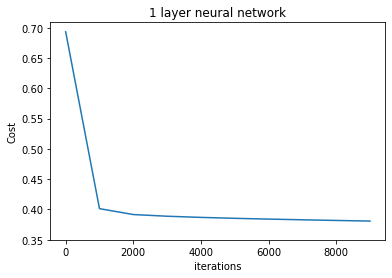

In [13]:
import matplotlib.pyplot as plt

x=iterations
y=costs
plt.plot(x,y)


y_ticks = [0.7,0.65,0.6,0.55,0.5,0.45,0.4,0.35]
plt.yticks(y_ticks)

plt.xlabel('iterations')
plt.ylabel('Cost')
plt.title("1 layer neural network")
plt.show()